In [101]:
import tensorflow as tf
import numpy as np

def get_mnist_train_test_set():
  # Load the MNIST dataset
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Normalize the data and expand dimensions
  x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
  x_train=x_train / 255.0
  x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
  x_test=x_test/255.0

  y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
  y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

  return (x_train, y_train), (x_test, y_test)

def build_cnn_model():
  # Define the CNN model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
      tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
      tf.keras.layers.MaxPool2D(strides=(2,2)),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])
  return model

In [103]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pathlib
import math

def load_model():
  return tf.keras.models.load_model("mnist-cnn.hdf5")

def load_images():
  image_dir = pathlib.Path('./digits-2')
  image_paths = list(image_dir.glob("*.png"))
  images = []
  for path in image_paths:
    img = tf.keras.preprocessing.image.load_img(path, color_mode="grayscale", target_size=(28, 28))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(28, 28, 1).astype('float32') / 255.0
    images.append(img)
  return np.array(images)

def max_idx(arr):
  cur_max = arr[0]
  res = 0
  for i, num in enumerate(arr):
    if num > cur_max:
      res = i
      cur_max = num
  return res


def plot_predictions(images, predictions):
  plt.close('all')
  plt.figure(figsize=(12, 3 * len(images) / 5))
  p = [max_idx(p) for p in predictions]
  for idx, img in enumerate(images):
    plt.subplot(math.ceil(len(images) / 5), 5, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{p[idx]}")
  plt.tight_layout()

In [104]:
(x_train, y_train), (x_test, y_test) = get_mnist_train_test_set()
model = build_cnn_model()
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1415 - acc: 0.9565
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0559 - acc: 0.9836
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0470 - acc: 0.9866
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0424 - acc: 0.9878
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0415 - acc: 0.9887


In [105]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy: %.4f" % test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0253 - acc: 0.9928
Accuracy: 0.9928


1/1 [==============================] - 0s 81ms/step


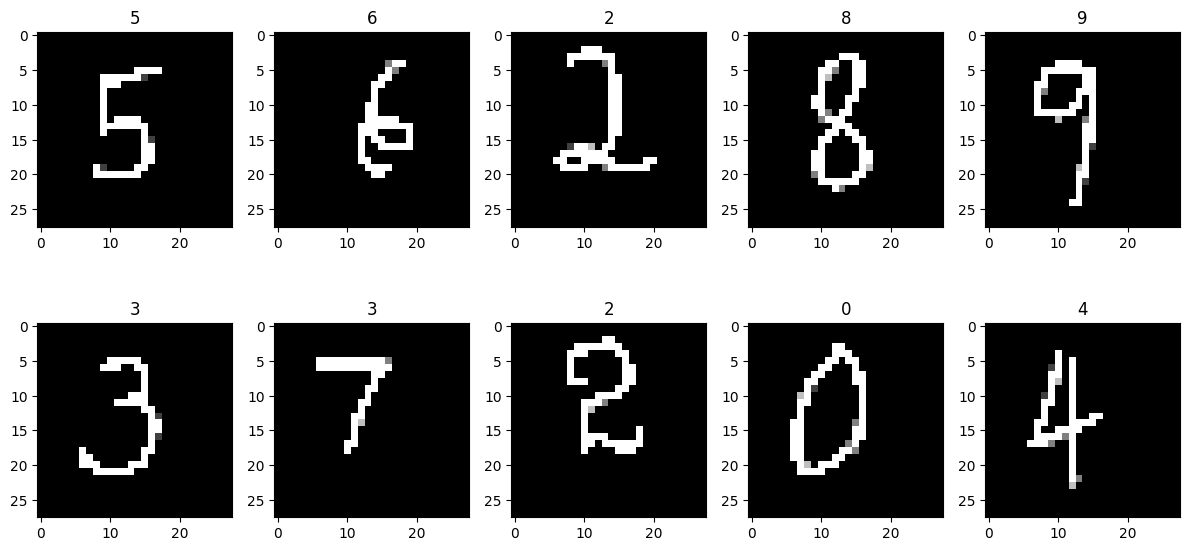

In [106]:
images = load_images()
predictions = model.predict(images)
plot_predictions(images, predictions)